Importación de Librerias

In [ ]:
import pandas as pd #proporciona estructuras de datos y herramientas de análisis de datos
import numpy as np  #Importación de Librería Numpy para manejo de vectores
import matplotlib.pyplot as plt  #Librería para graficar
import seaborn as sns

Carga de Datos

In [ ]:
data_frame = pd.read_csv("weatherAUS_ORIGINAL.csv")
data_frame.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
num_filas, num_columnas = data_frame.shape
print(f"El dataFrame tiene {num_filas} filas y {num_columnas} columnas") #devuelve una tupla que indica el número de filas y columnas en el DataFrame.

El dataFrame tiene 142193 filas y 24 columnas


Cantidad de nulos por columna

In [ ]:
data_frame.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

Obtenemos las características númericas, donde se muestran los porcenmtajes equivalentes a los valores nulos presentes en las columnas

In [ ]:
numericas = [num for num in data_frame.columns if data_frame[num].dtype!='O']
nulos_num = data_frame[numericas].isnull().sum()
porc_nulos_num = data_frame[numericas].isnull().sum() / data_frame.shape[0] * 100
frame_num = pd.DataFrame({'Valores nulos': nulos_num , 'Porcentaje': porc_nulos_num})
frame_num

,Valores nulos,Porcentaje
MinTemp,637,0.447983
MaxTemp,322,0.226453
Rainfall,1406,0.988797
Evaporation,60843,42.789026
Sunshine,67816,47.692924
WindGustSpeed,9270,6.519308
WindSpeed9am,1348,0.948007
WindSpeed3pm,2630,1.849599
Humidity9am,1774,1.247600
Humidity3pm,3610,2.538803


Eliminar las columnas no deseadas: "WindGustDir", "WindDir9am", "WindDir3pm"

In [ ]:
if all(col not in data_frame.columns for col in ["WindGustDir", "WindDir9am", "WindDir3pm"]):
    print("Las columnas han sido eliminadas")
else:

    df = data_frame.drop(["WindGustDir", "WindDir9am", "WindDir3pm"], axis=1)

num_filas, num_columnas = df.shape
print(f"El dataFrame tiene {num_filas} filas y {num_columnas} columnas")

El dataFrame tiene 142193 filas y 21 columnas


Diccionario con los nuevos nombres de las columna

In [ ]:
nuevos_nombres = {
    'Date': 'Fecha',
    'Location': 'Localización',
    'MinTemp': 'Temp. Minima',
    'MaxTemp': 'Temp. Maxima',
    'Rainfall': 'Lluvia en ML',
    'Evaporation': 'Evaporacion en ML',
    'Sunshine': 'Cant. Horas de sol/hora',
    'WindGustSpeed': 'Vel. rafaga de viento',
    'WindSpeed9am': 'Vel. viento a las 9am',
    'WindSpeed3pm': 'Vel. viento a las 3pm',
    'Humidity9am': 'Porc. Humedad 9am',
    'Humidity3pm': 'Porc. Humedad 3pm',
    'Pressure9am': 'Presion Atmos. 9am',
    'Pressure3pm': 'Presion Atmos. 3pm',
    'Cloud9am': 'Cielo cubierto por nubes 9am',
    'Cloud3pm': 'Cielo cubierto por nubes 3pm',
    'Temp9am': 'Temp. 9am',
    'Temp3pm': 'Temp. 3pm',
    'RainToday': 'llovió durante el día',
    'RISK_MM': 'Lluvia Acum. Al dia siguiente en ml',
    'RainTomorrow': 'Lluvia dia siguiente'
}

In [ ]:
#renombra los encabezados de columna
data = df.rename(columns=nuevos_nombres)

In [ ]:
#muestra los primeros registros para verificar los cambios
data.head()

,Fecha,Localización,Temp. Minima,Temp. Maxima,Lluvia en ML,Evaporacion en ML,Cant. Horas de sol/hora,Vel. rafaga de viento,Vel. viento a las 9am,Vel. viento a las 3pm,...,Porc. Humedad 3pm,Presion Atmos. 9am,Presion Atmos. 3pm,Cielo cubierto por nubes 9am,Cielo cubierto por nubes 3pm,Temp. 9am,Temp. 3pm,llovió durante el día,Lluvia Acum. Al dia siguiente en ml,Lluvia dia siguiente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
data.isnull().sum()

Fecha                                      0
Localización                               0
Temp. Minima                             637
Temp. Maxima                             322
Lluvia en ML                            1406
Evaporacion en ML                      60843
Cant. Horas de sol/hora                67816
Vel. rafaga de viento                   9270
Vel. viento a las 9am                   1348
Vel. viento a las 3pm                   2630
Porc. Humedad 9am                       1774
Porc. Humedad 3pm                       3610
Presion Atmos. 9am                     14014
Presion Atmos. 3pm                     13981
Cielo cubierto por nubes 9am           53657
Cielo cubierto por nubes 3pm           57094
Temp. 9am                                904
Temp. 3pm                               2726
llovió durante el día                   1406
Lluvia Acum. Al dia siguiente en ml        0
Lluvia dia siguiente                       0
dtype: int64

# from sklearn.preprocessing import LabelEncoder
#Aplicar el encoding a la columna 'llovió durante el día'
le = LabelEncoder()
data['llovió durante el día'] = le.fit_transform(data['llovió durante el día'])

total_transformed = data['llovió durante el día'].count()
total_not_transformed = data['llovió durante el día'].isnull().sum()

print(f"Se transformaron {total_transformed} valores de la columna 'llovió durante el día'")
print(f"No se pudo transformar {total_not_transformed} valores nulos en la columna 'llovió durante el día'")

print("El código se ejecutó correctamente.")

In [ ]:
#Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

#Columnas en las que se aplicará KNN
columnas = ['Temp. Minima','Temp. Maxima', 'Lluvia en ML', 'Evaporacion en ML', 'Cant. Horas de sol/hora', 'Vel. rafaga de viento', 'Vel. viento a las 9am', 'Vel. viento a las 3pm', 'Porc. Humedad 9am', 'Porc. Humedad 3pm', 'Presion Atmos. 9am', 'Presion Atmos. 3pm', 'Cielo cubierto por nubes 9am', 'Cielo cubierto por nubes 3pm', 'Temp. 9am', 'Temp. 3pm']

#Crear un imputador KNN con 5 vecinos
imputador = KNNImputer(n_neighbors=5)

#Aplicar el imputador por columnas
for col in columnas:
    print("Procesando columna:", col)
    data[col] = imputador.fit_transform(data[[col]])

Procesando columna: Temp. Minima
Procesando columna: Temp. Maxima
Procesando columna: Lluvia en ML
Procesando columna: Evaporacion en ML
Procesando columna: Cant. Horas de sol/hora
Procesando columna: Vel. rafaga de viento
Procesando columna: Vel. viento a las 9am
Procesando columna: Vel. viento a las 3pm
Procesando columna: Porc. Humedad 9am
Procesando columna: Porc. Humedad 3pm
Procesando columna: Presion Atmos. 9am
Procesando columna: Presion Atmos. 3pm
Procesando columna: Cielo cubierto por nubes 9am
Procesando columna: Cielo cubierto por nubes 3pm
Procesando columna: Temp. 9am
Procesando columna: Temp. 3pm


In [ ]:
data.isnull().sum()

Fecha                                  0
Localización                           0
Temp. Minima                           0
Temp. Maxima                           0
Lluvia en ML                           0
Evaporacion en ML                      0
Cant. Horas de sol/hora                0
Vel. rafaga de viento                  0
Vel. viento a las 9am                  0
Vel. viento a las 3pm                  0
Porc. Humedad 9am                      0
Porc. Humedad 3pm                      0
Presion Atmos. 9am                     0
Presion Atmos. 3pm                     0
Cielo cubierto por nubes 9am           0
Cielo cubierto por nubes 3pm           0
Temp. 9am                              0
Temp. 3pm                              0
llovió durante el día                  0
Lluvia Acum. Al dia siguiente en ml    0
Lluvia dia siguiente                   0
dtype: int64

In [ ]:
data.head()

,Fecha,Localización,Temp. Minima,Temp. Maxima,Lluvia en ML,Evaporacion en ML,Cant. Horas de sol/hora,Vel. rafaga de viento,Vel. viento a las 9am,Vel. viento a las 3pm,...,Porc. Humedad 3pm,Presion Atmos. 9am,Presion Atmos. 3pm,Cielo cubierto por nubes 9am,Cielo cubierto por nubes 3pm,Temp. 9am,Temp. 3pm,llovió durante el día,Lluvia Acum. Al dia siguiente en ml,Lluvia dia siguiente
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,No


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Seleccionar columnas numéricas
column_names = numeric_data.columns  # Obtener los nombres de las columnas

sc = StandardScaler()
scaled_data = sc.fit_transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=column_names)  # Convertir los datos escalados en un DataFrame con los nombres de las columnas


In [ ]:
pd.DataFrame(scaled_data).head()

,Temp. Minima,Temp. Maxima,Lluvia en ML,Evaporacion en ML,Cant. Horas de sol/hora,Vel. rafaga de viento,Vel. viento a las 9am,Vel. viento a las 3pm,Porc. Humedad 9am,Porc. Humedad 3pm,Presion Atmos. 9am,Presion Atmos. 3pm,Cielo cubierto por nubes 9am,Cielo cubierto por nubes 3pm,Temp. 9am,Temp. 3pm,Lluvia Acum. Al dia siguiente en ml
0,0.189954,-0.045964,-0.207757,0.0,-6.495101e-16,0.305648,0.677661,0.614850,0.113891,-1.435935,-1.475456,-1.220966,1.563959,-4.219974e-16,-0.013521,0.016412,-0.278450
1,-0.749174,0.263480,-0.278989,0.0,-6.495101e-16,0.305648,-1.130034,0.385532,-1.312265,-1.289821,-1.045586,-1.116203,0.000000,-4.219974e-16,0.032832,0.380274,-0.278450
2,0.111694,0.347873,-0.278989,0.0,-6.495101e-16,0.457874,0.564680,0.844167,-1.629188,-1.046299,-1.490279,-0.981508,0.000000,-1.189322e+00,0.619963,0.220175,-0.278450
3,-0.467436,0.671383,-0.278989,0.0,-6.495101e-16,-1.216614,-0.339167,-1.105034,-1.259444,-1.728162,-0.007969,-0.367897,0.000000,-4.219974e-16,0.171889,0.700472,-0.160497
4,0.831692,1.276205,-0.160269,0.0,-6.495101e-16,0.077309,-0.791091,0.156214,0.694918,-0.900186,-1.015940,-1.385593,1.124991,1.661439e+00,0.125537,1.166215,-0.254859


El objeto range() en Python crea una secuencia de números enteros en un rango específico. En este caso, len(lluvia_data) devuelve la longitud de la variable lluvia_data, es decir, el número de elementos en esa columna de datos.

Por lo tanto, range(len(lluvia_data)) crea una secuencia que va desde 0 hasta len(lluvia_data) - 1, que son los índices de los elementos en la variable lluvia_data

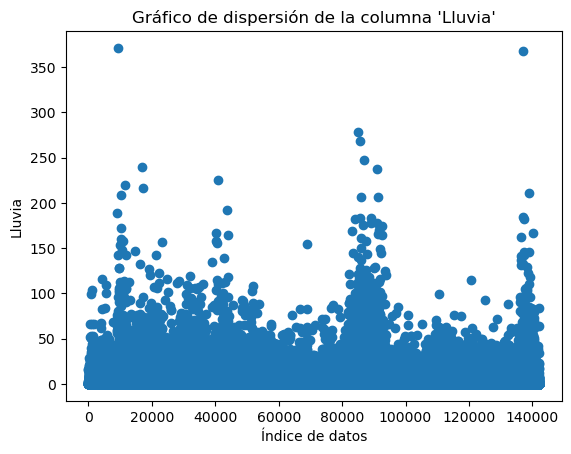

In [ ]:
import matplotlib.pyplot as plt

# Obtener los datos de la columna "Lluvia"
lluvia_data = data["Lluvia en ML"]

# Crear el gráfico de dispersión
plt.scatter(range(len(lluvia_data)), lluvia_data)
plt.xlabel("Índice de datos")
plt.ylabel("Lluvia en ML")
plt.title("Gráfico de dispersión de la columna 'Lluvia'")
plt.show()

In [ ]:
scaled_data.describe()

,Temp. Minima,Temp. Maxima,Lluvia en ML,Evaporacion en ML,Cant. Horas de sol/hora,Vel. rafaga de viento,Vel. viento a las 9am,Vel. viento a las 3pm,Porc. Humedad 9am,Porc. Humedad 3pm,Presion Atmos. 9am,Presion Atmos. 3pm,Cielo cubierto por nubes 9am,Cielo cubierto por nubes 3pm,Temp. 9am,Temp. 3pm,Lluvia Acum. Al dia siguiente en ml
count,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,1.663012e-16,-2.238670e-16,7.255688e-17,-1.103344e-16,-4.707073e-16,-1.874886e-16,1.599050e-18,1.679002e-17,1.471126e-16,-7.643458e-16,-1.490794e-14,-1.865771e-14,-1.471126e-16,-4.349415e-16,-3.421966e-16,-1.535088e-16,-2.818325e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.237865e+00,-3.942143e+00,-2.789887e-01,-1.726530e+00,-2.787964e+00,-2.586651e+00,-1.581958e+00,-2.136964e+00,-3.636371e+00,-2.507433e+00,-5.507341e+00,-5.710798e+00,-1.947782e+00,-2.139575e+00,-3.737171e+00,-3.942400e+00,-2.784499e-01
25%,-7.178699e-01,-7.492457e-01,-2.789887e-01,-4.639446e-01,-6.495101e-16,-6.838225e-01,-7.910912e-01,-6.463983e-01,-6.255971e-01,-7.053678e-01,-6.157160e-01,-6.372873e-01,-6.308796e-01,-2.390681e-01,-7.242591e-01,-7.258651e-01,-2.784499e-01
50%,-2.917555e-02,-7.409551e-02,-2.789887e-01,0.000000e+00,-6.495101e-16,-7.491751e-02,-1.132055e-01,0.000000e+00,6.107062e-02,-6.921323e-16,0.000000e+00,-1.701449e-14,0.000000e+00,-4.219974e-16,-2.897164e-02,-5.635995e-02,-2.784499e-01
75%,7.221273e-01,6.995141e-01,-1.840128e-01,0.000000e+00,3.931185e-01,4.578744e-01,5.646801e-01,6.148497e-01,7.477383e-01,6.583576e-01,6.146018e-01,6.198657e-01,6.860233e-01,7.111855e-01,6.972175e-01,6.713630e-01,-1.840874e-01
max,3.398644e+00,3.498574e+00,4.376610e+01,4.404218e+01,2.513840e+00,7.231942e+00,1.310556e+01,7.838361e+00,1.645688e+00,2.363014e+00,3.460638e+00,3.643019e+00,2.002926e+00,2.136566e+00,3.586523e+00,3.640473e+00,4.348218e+01


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Separar los datos en conjuntos de entrenamiento y prueba
X = scaled_data['Temp. Minima'].values.reshape(-1,1)
y = scaled_data['Temp. Maxima'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar el modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realizar predicciones
y_pred = regressor.predict(X_test)

# Calcular y mostrar métricas
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrado medio:', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del error cuadrado medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error absoluto medio: 0.5521065423897934
Error cuadrado medio: 0.4675607094975454
Raíz del error cuadrado medio: 0.68378411029911


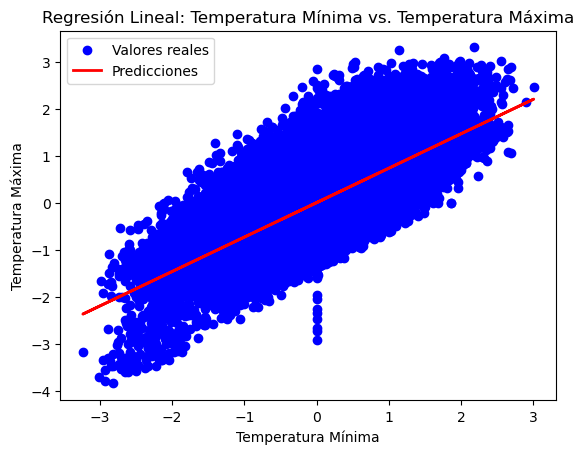

In [ ]:
import matplotlib.pyplot as plt

# Graficar los valores reales y las predicciones
plt.scatter(X_test, y_test, color='blue', label='Valores reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('Temperatura Mínima')
plt.ylabel('Temperatura Máxima')
plt.title('Regresión Lineal: Temperatura Mínima vs. Temperatura Máxima')
plt.legend()
plt.show()


In [ ]:
# Separar los datos en conjuntos de entrenamiento y prueba
X = scaled_data[['Temp. Minima', 'Lluvia en ML']]
y = scaled_data['Temp. Maxima']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar el modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realizar predicciones
y_pred = regressor.predict(X_test)

# Calcular y mostrar métricas
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrado medio:', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del error cuadrado medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error absoluto medio: 0.5358517163071399
Error cuadrado medio: 0.44249462891691416
Raíz del error cuadrado medio: 0.6652026976169851


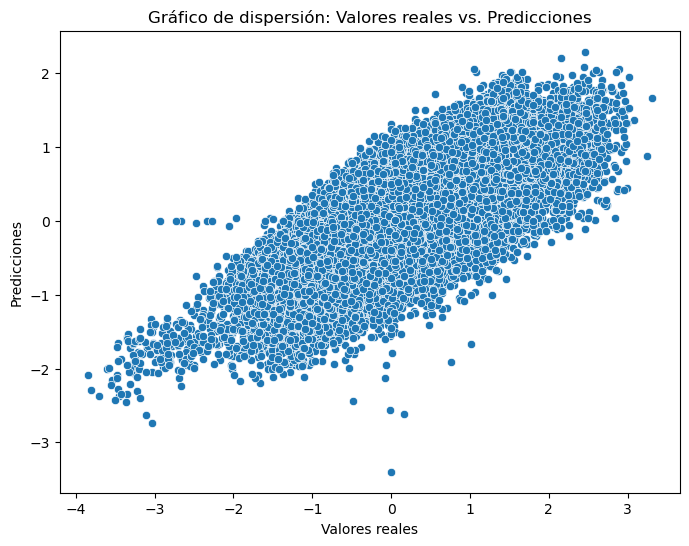

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión: Valores reales vs. Predicciones')
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


# Regresión logística

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('Lluvia dia siguiente', axis=1)
y = data['Lluvia dia siguiente']

# Definir las columnas categóricas
categorical_cols = ['Localización', 'llovió durante el día']

# Definir el preprocesamiento de las columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse=False, drop='first'))
])

# Aplicar el preprocesamiento a todas las columnas
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols)
])

# Crear el modelo de regresión logística
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)

E:\Anaconda_Navigator\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Precisión del modelo de regresión logística: 0.7774886599388164


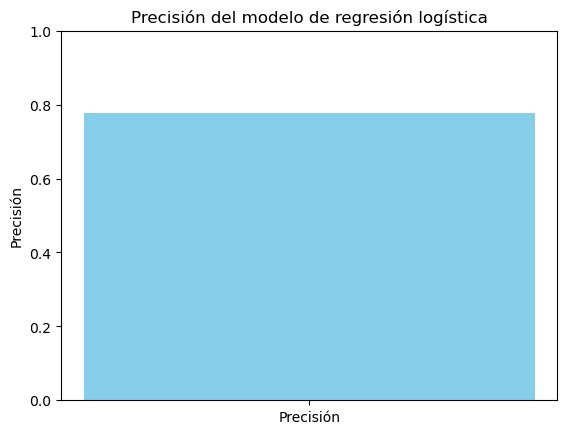

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras celestes para mostrar la precisión
labels = ['Precisión']
values = [accuracy]

plt.bar(labels, values, color='skyblue')
plt.ylim(0, 1)  # Establecer límites para el eje y
plt.ylabel('Precisión')
plt.title('Precisión del modelo de regresión logística')

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Preparar los datos
X = scaled_data[['Temp. Minima', 'Temp. Maxima', 'Lluvia en ML']]
y = scaled_data['Lluvia Acum. Al dia siguiente en ml']

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo de regresión
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Realizar predicciones
y_pred = regressor.predict(X_test)

# Calcular y mostrar métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 1.7604686759135801
Coeficiente de determinación (R^2): -0.7863742085960583


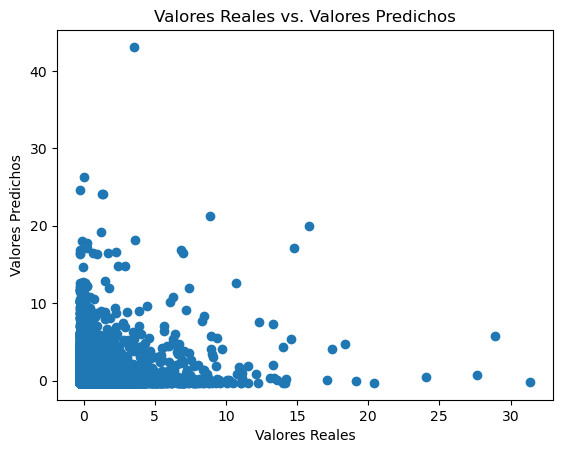

In [ ]:
import matplotlib.pyplot as plt

# Graficar los valores reales vs. los valores predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Seleccionar las características y el objetivo
features = ["Porc. Humedad 3pm"]
target = "Temp. Maxima"

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(scaled_data[features], scaled_data[target], test_size=0.2, random_state=42)

# Crear el modelo de árbol de regresión
model = DecisionTreeRegressor()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, predictions)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 0.7026901431579952


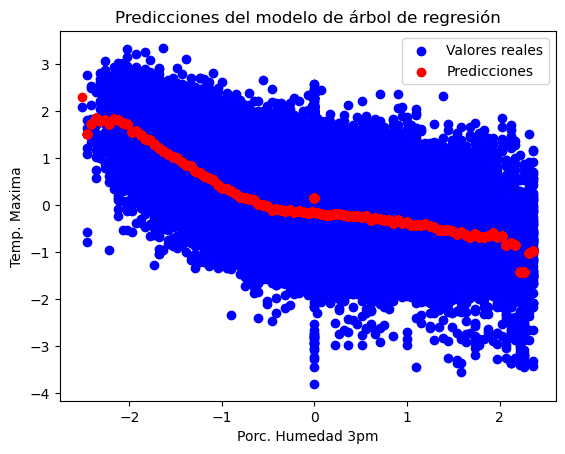

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar las predicciones y los valores reales
ax.scatter(X_test, y_test, color='b', label='Valores reales')
ax.scatter(X_test, predictions, color='r', label='Predicciones')

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Porc. Humedad 3pm')
ax.set_ylabel('Temp. Maxima')
ax.set_title('Predicciones del modelo de árbol de regresión')

# Mostrar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Seleccionar las columnas relevantes
columns = ['Temp. Minima', 'Temp. Maxima', 'Lluvia en ML', 'Cant. Horas de sol/hora', 'Porc. Humedad 9am', 'Porc. Humedad 3pm', 'Cielo cubierto por nubes 9am', 'Cielo cubierto por nubes 3pm']

# Crear el conjunto de características (X) y la variable objetivo (y)
X = scaled_data[columns]
y = scaled_data['Porc. Humedad 9am']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión de árbol de decisión
regressor = DecisionTreeRegressor()

# Entrenar el modelo
regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 3.74187031352185e-28


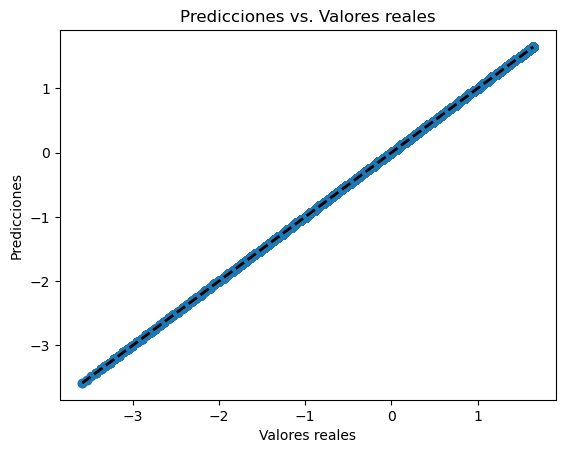

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia diagonal
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.show()

Coeficiente de determinación (R²): 0.21
Error cuadrático medio (MSE): 0.74
Raíz del error cuadrático medio (RMSE): 0.86
Coeficiente de correlación de Pearson: 0.45

Tabla de resultados:
                                  Métrica     Valor
0       Coeficiente de determinación (R²)  0.205022
1            Error cuadrático medio (MSE)  0.737638
2  Raíz del error cuadrático medio (RMSE)  0.858859
3   Coeficiente de correlación de Pearson  0.452931


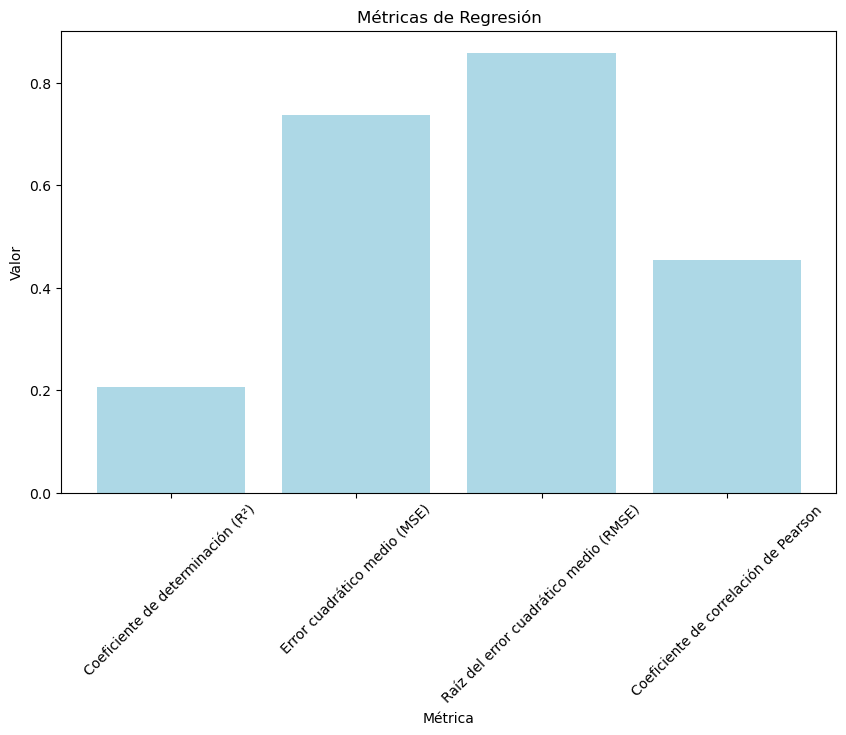

In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

X = scaled_data[['Temp. Maxima', 'Temp. Minima', 'Lluvia en ML']]
y = scaled_data['Evaporacion en ML']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R²): {:.2f}".format(r2))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE): {:.2f}".format(mse))

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Raíz del error cuadrático medio (RMSE): {:.2f}".format(rmse))

# Calcular el coeficiente de correlación de Pearson
pearson_corr, _ = pearsonr(y_test, y_pred)
print("Coeficiente de correlación de Pearson: {:.2f}".format(pearson_corr))

# Crear una tabla para mostrar los resultados
results = pd.DataFrame({'Métrica': ['Coeficiente de determinación (R²)', 'Error cuadrático medio (MSE)',
                                    'Raíz del error cuadrático medio (RMSE)', 'Coeficiente de correlación de Pearson'],
                       'Valor': [r2, mse, rmse, pearson_corr]})
print("\nTabla de resultados:")
print(results)

# Crear un gráfico de barras para visualizar las métricas
plt.figure(figsize=(10, 6))
plt.bar(results['Métrica'], results['Valor'], color='lightblue')
plt.title('Métricas de Regresión')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Random Forest

# Seleccionar solo las columnas numéricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Crear un nuevo DataFrame con las columnas numéricas
X_numeric = X[numeric_cols]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Crear un imputador para reemplazar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Crear el modelo de Random Forest para regresión
regressor = RandomForestRegressor()

# Entrenar el modelo con los datos imputados
regressor.fit(X_train_imputed, y_train)

# Realizar predicciones en los datos de prueba
y_pred = regressor.predict(X_test_imputed)

# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio del modelo de Random Forest:", mse)


Error cuadrático medio del modelo de Random Forest: 0.8912888380459881


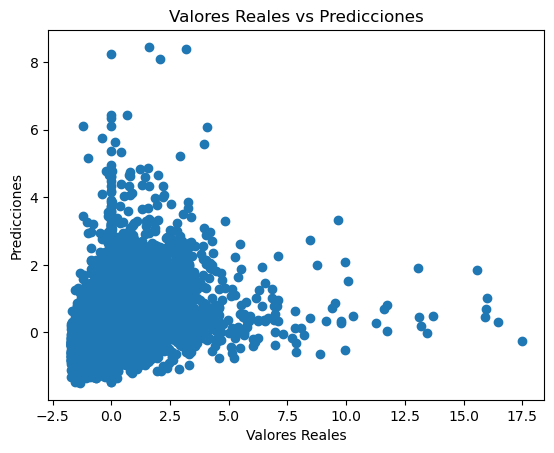

In [ ]:
import matplotlib.pyplot as plt

# Graficar los valores reales vs predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()


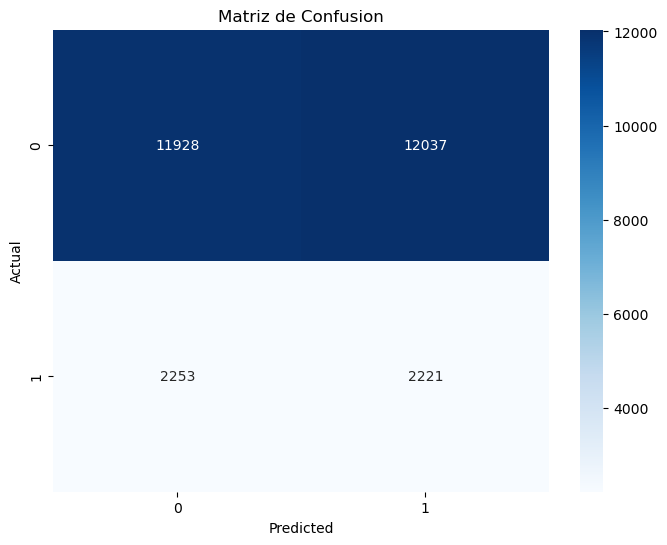

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Supongamos que ya tienes definidas las variables y_test y y_pred_discrete

# Convertir las etiquetas continuas en binarias para y_test
y_test_bin = np.where(y_test < 0.5, 0, 1)

# Calcular y_pred_discrete (reemplaza esta línea con el cálculo real)
y_pred_discrete = np.random.rand(len(y_test))

# Convertir las predicciones continuas en binarias para y_pred_discrete
y_pred_discrete_bin = np.where(y_pred_discrete < 0.5, 0, 1)

# Crear la matriz de confusión
cm = confusion_matrix(y_test_bin, y_pred_discrete_bin)

# Configurar el gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusion")

# Mostrar el gráfico
plt.show()




In [ ]:
scaled_data.head()

,Temp. Minima,Temp. Maxima,Lluvia en ML,Evaporacion en ML,Cant. Horas de sol/hora,Vel. rafaga de viento,Vel. viento a las 9am,Vel. viento a las 3pm,Porc. Humedad 9am,Porc. Humedad 3pm,Presion Atmos. 9am,Presion Atmos. 3pm,Cielo cubierto por nubes 9am,Cielo cubierto por nubes 3pm,Temp. 9am,Temp. 3pm,Lluvia Acum. Al dia siguiente en ml
0,0.189954,-0.045964,-0.207757,0.0,-6.495101e-16,0.305648,0.677661,0.614850,0.113891,-1.435935,-1.475456,-1.220966,1.563959,-4.219974e-16,-0.013521,0.016412,-0.278450
1,-0.749174,0.263480,-0.278989,0.0,-6.495101e-16,0.305648,-1.130034,0.385532,-1.312265,-1.289821,-1.045586,-1.116203,0.000000,-4.219974e-16,0.032832,0.380274,-0.278450
2,0.111694,0.347873,-0.278989,0.0,-6.495101e-16,0.457874,0.564680,0.844167,-1.629188,-1.046299,-1.490279,-0.981508,0.000000,-1.189322e+00,0.619963,0.220175,-0.278450
3,-0.467436,0.671383,-0.278989,0.0,-6.495101e-16,-1.216614,-0.339167,-1.105034,-1.259444,-1.728162,-0.007969,-0.367897,0.000000,-4.219974e-16,0.171889,0.700472,-0.160497
4,0.831692,1.276205,-0.160269,0.0,-6.495101e-16,0.077309,-0.791091,0.156214,0.694918,-0.900186,-1.015940,-1.385593,1.124991,1.661439e+00,0.125537,1.166215,-0.254859


E:\Anaconda_Navigator\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda_Navigator\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


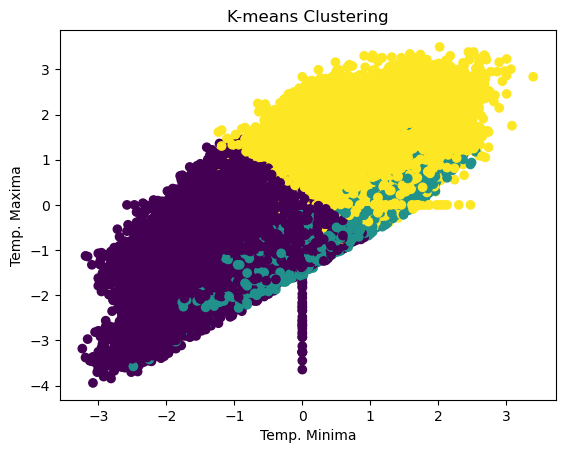

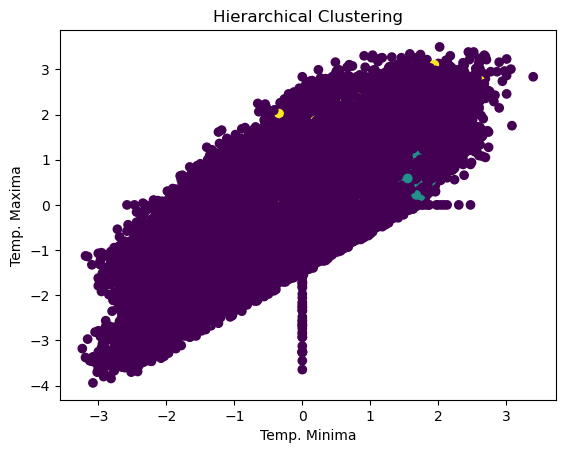

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import Birch


features = scaled_data[['Temp. Minima', 'Temp. Maxima', 'Lluvia en ML', 'Evaporacion en ML', 'Cant. Horas de sol/hora']]

# Preprocesar los datos estandarizándolos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar K-means usando MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3, random_state=24)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Aplicar Clustering jerárquico usando Birch
hierarchical = Birch(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_features)

# Agregar las etiquetas de clustering al dataframe original
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels

# Visualizar los clusters en un gráfico
plt.scatter(scaled_data['Temp. Minima'], scaled_data['Temp. Maxima'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Temp. Minima')
plt.ylabel('Temp. Maxima')
plt.show()

plt.scatter(scaled_data['Temp. Minima'], scaled_data['Temp. Maxima'], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Temp. Minima')
plt.ylabel('Temp. Maxima')
plt.show()

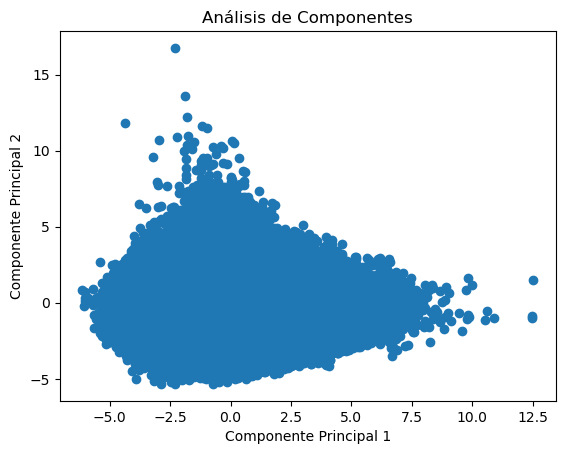

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seleccionar las columnas numéricas relevantes
numeric_columns = ['Temp. Minima', 'Temp. Maxima', 'Lluvia en ML', 'Evaporacion en ML', 'Cant. Horas de sol/hora', 'Porc. Humedad 9am', 'Porc. Humedad 3pm', 'Presion Atmos. 9am',
                   'Presion Atmos. 3pm', 'Cielo cubierto por nubes 9am', 'Cielo cubierto por nubes 3pm', 'Temp. 9am']

# Preparar los datos
data_numeric = scaled_data[numeric_columns]

# Reemplazar los valores faltantes con la media de cada columna
data_numeric_filled = data_numeric.fillna(data_numeric.mean())

# Estandarizar los datos
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric_filled)

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_numeric_scaled)

# Visualizar los resultados del PCA
import matplotlib.pyplot as plt

# Gráfico de dispersión

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análisis de Componentes')
plt.show()

E:\Anaconda_Navigator\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


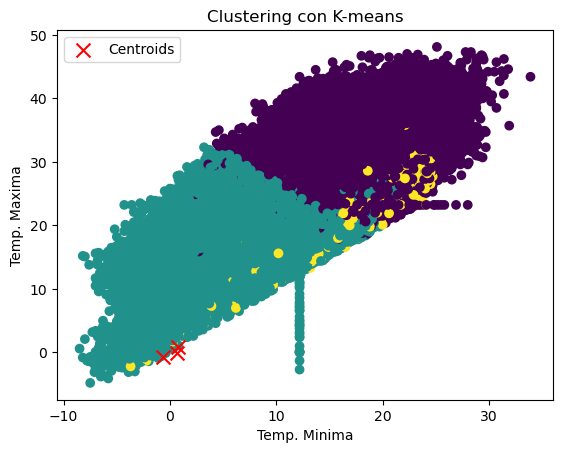

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para el clustering
cluster_columns = ['Temp. Minima', 'Temp. Maxima', 'Lluvia en ML', 'Evaporacion en ML', 'Cant. Horas de sol/hora']

# Preparar los datos
data_cluster = data[cluster_columns]

# Crear el imputador y el escalador
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Definir el pipeline con el imputador, escalador y K-means
pipeline = Pipeline([('imputer', imputer), ('scaler', scaler), ('kmeans', KMeans(n_clusters=3, random_state=42))])

# Aplicar el pipeline a los datos
kmeans_labels = pipeline.fit_predict(data_cluster)

# Obtener las coordenadas de los centroides
centroids = pipeline.named_steps['kmeans'].cluster_centers_

# Obtener las etiquetas de cluster asignadas a cada muestra
labels = pipeline.named_steps['kmeans'].labels_

# Crear el DataFrame df_cluster con las columnas relevantes
df_cluster = data[cluster_columns]

# Crear un gráfico de dispersión de las muestras coloreadas por cluster
plt.scatter(df_cluster['Temp. Minima'], df_cluster['Temp. Maxima'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.xlabel('Temp. Minima')
plt.ylabel('Temp. Maxima')
plt.title('Clustering con K-means')
plt.legend()
plt.show()

In [ ]:
data.head()

,Fecha,Localización,Temp. Minima,Temp. Maxima,Lluvia en ML,Evaporacion en ML,Cant. Horas de sol/hora,Vel. rafaga de viento,Vel. viento a las 9am,Vel. viento a las 3pm,...,Porc. Humedad 3pm,Presion Atmos. 9am,Presion Atmos. 3pm,Cielo cubierto por nubes 9am,Cielo cubierto por nubes 3pm,Temp. 9am,Temp. 3pm,llovió durante el día,Lluvia Acum. Al dia siguiente en ml,Lluvia dia siguiente
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,No


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Separar los datos en conjuntos de entrenamiento y prueba
X = scaled_data[['Temp. Minima', 'Temp. Maxima', 'Lluvia en ML', 'Evaporacion en ML', 'Cant. Horas de sol/hora']]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['llovió durante el día'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el clasificador Naive Bayes
classifier = GaussianNB()

# Entrenar el clasificador
classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Calcular y mostrar las métricas de evaluación
print('Exactitud:', metrics.accuracy_score(y_test, y_pred))
print('Precisión:', metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', metrics.f1_score(y_test, y_pred, average='weighted'))

Exactitud: 0.9727838531593938
Precisión: 0.9757558195327896
Recall: 0.9727838531593938
F1-score: 0.9733244782707238


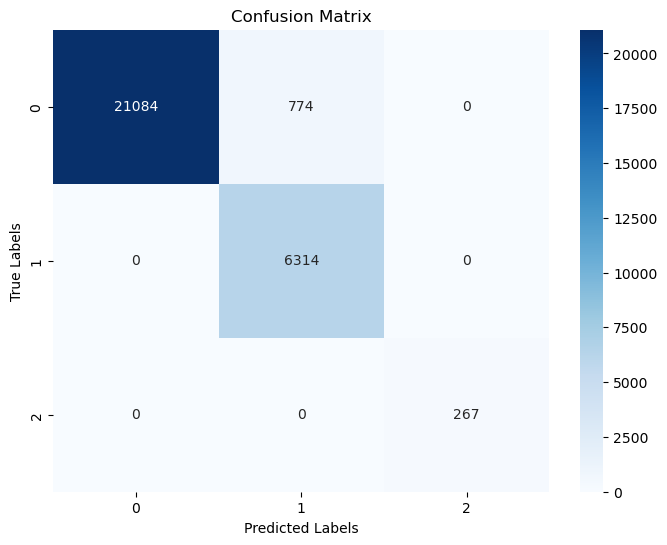

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Separar los datos en conjuntos de entrenamiento y prueba
X = scaled_data[['Temp. Minima', 'Temp. Maxima', 'Lluvia en ML', 'Evaporacion en ML', 'Cant. Horas de sol/hora']]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['llovió durante el día'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el clasificador Naive Bayes
classifier = GaussianNB()

# Entrenar el clasificador
classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Calcular la matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión en un gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
